#### Customer Shopping Complete Analysis. Data obtained from Kaggle, pertaining to purchases of wine, fruit, meat, fish, sweets and gold products from an unnamed retailer. 
We will first import and clean up the data, then do some basic descriptive statistics and visualizations, then some basic comparisons using ANOVA and T-Tests. Finally we will build a PCA model which will cluster the customers. 
##### Authored by Josip Zivkovic

In [70]:
import numpy as np 
import pandas as pd 
import datetime
from matplotlib import pyplot as plt 
import seaborn as sb

import scipy.stats as stats
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer

In [71]:
data=pd.read_csv(r'marketing_campaign.csv', header=0, delimiter='	')
#data.info()

In [72]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84


In [73]:
#Checking for NaNs
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [74]:
#Income has 24 missing values. We will replace those with the mean value for income
data.fillna(data['Income'].mean(), inplace=True)

In [75]:
#Reformat the date format
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].apply(['min','max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [76]:
#Check again the counts for the Marital status and Education
print('Marital Status:\n', data['Marital_Status'].value_counts(), '\n')
print('Education Status:\n', data['Education'].value_counts())

Marital Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Education Status:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


Text(0.5, 1.0, 'Proportion of Marital Status')

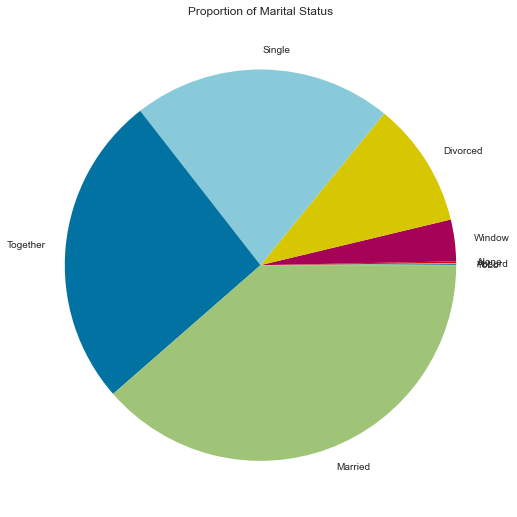

In [77]:
#Percentage of Customers by different marital status
plt.figure(figsize=(9,9))
x=data['Marital_Status'].value_counts().sort_values()
plt.pie(x=x, labels=['YoLo', 'Absurd','Alone', 'Window', 'Divorced', 'Single', 'Together','Married'])
#plt.axis('equal')
plt.title('Proportion of Marital Status')

Text(0.5, 1.0, 'Propotion of Education')

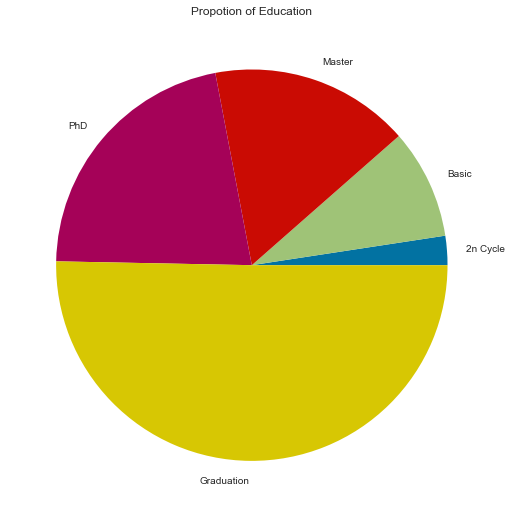

In [78]:
#Percentage of customers with different education levels
x=data['Education'].value_counts().sort_values()
plt.figure(figsize=(9,9))
plt.pie(x=x, labels=['2n Cycle', 'Basic', 'Master', 'PhD', 'Graduation'])
plt.title('Propotion of Education')

### Data preprocessing


In [79]:
#Create a column Age, derived from the date of birth
data['Age']=2014 - data['Year_Birth']

#Create a column Spent, total spent in the shop
data['Spent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

#Create a (total) children column
data['Children']=data['Teenhome']+data['Kidhome']

#Create a Total Accepted Cmp (total number of accepted quotes)
data['TotalAcceptedCmp']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']

#Create a Num Total Purchases, pooling purchases from different sources
data['NumTotalPurchases']=data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumDealsPurchases']

#Recategorize Marital Status
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

#Recategorize Education
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

#Simplify Accepted Promo
data['Promo_Accepted']= data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['Response']

In [80]:
#Drop unnecessary columns - Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome' columns
data.drop(['Year_Birth','Z_CostContact','Z_Revenue','Kidhome','Teenhome'], axis=1, inplace=True)

In [81]:
#Delete outliers of income and age
data=data.drop(data.loc[data['Income']>(data['Income'].quantile(0.99))].index)
data=data.drop(data.loc[data['Age'] > 102].index)

In [82]:
#Create a column 'Have_Children' which is either 0 or 1
data['Have_Children'] = np.where(data.Children > 0, 1, 0)

In [83]:
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,Spent,Children,TotalAcceptedCmp,NumTotalPurchases,Promo_Accepted,Have_Children
0,5524,Postgraduate,Alone,58138.0,2012-04-09,58,635,88,546,172,...,0,0,1,57,1617,0,0,25,1,0
1,2174,Postgraduate,Alone,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,60,27,2,0,6,0,1
2,4141,Postgraduate,In couple,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,49,776,0,0,21,0,0
3,6182,Postgraduate,In couple,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,30,53,1,0,8,0,1
4,5324,Postgraduate,In couple,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,33,422,1,0,19,0,1


### Data Visualization and Basic Analyses

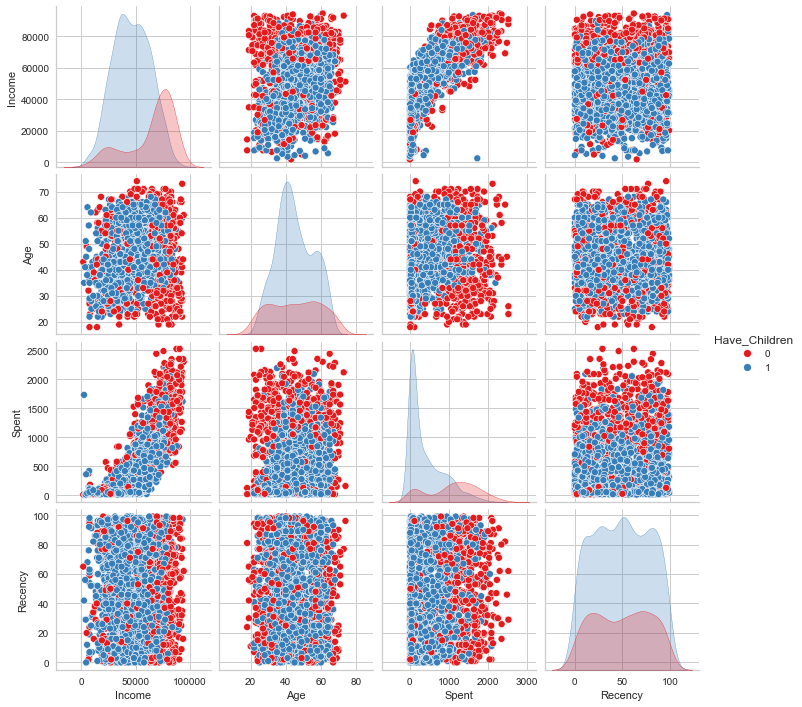

In [84]:
pairplot = data.loc[:, ['Income', 'Age', 'Spent', 'Recency', 'Have_Children']]

sb.pairplot(pairplot, hue='Have_Children', palette='Set1')

#### So it seems that having children is a huge factor determining how much people spend at the shop, as well as how much income they have. Let's explore it a little more.

Text(0.5, 1.0, 'How many children does the customer have')

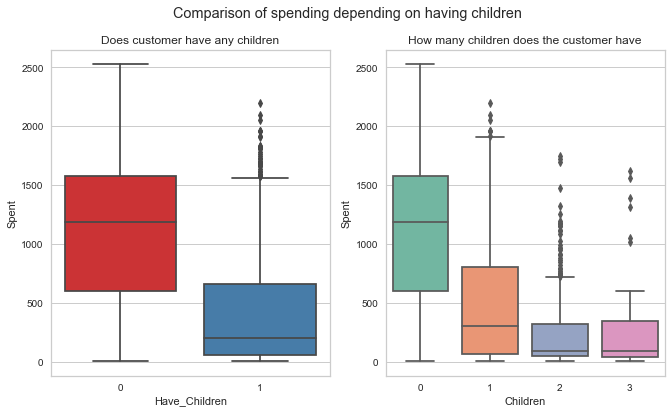

In [85]:
fig, axes = plt.subplots(1,2, figsize=(11,6))
sb.boxplot(ax=axes[0], x='Have_Children', y='Spent', data=data, palette='Set1')
sb.boxplot(ax=axes[1], x='Children', y='Spent', data=data, palette='Set2')

fig.suptitle('Comparison of spending depending on having children')
axes[0].set_title('Does customer have any children')
axes[1].set_title('How many children does the customer have')

#### There is definitely a clear difference in purchasing at the shop depending on whether one has kids, and apparently also on how many children. Let's statistically confirm it.

In [86]:
#First, let's do a T-Test on the difference between Have_Children groups, to statistically confirm that
#these two groups are drastically different
grouped1=data[['Have_Children','Spent']].groupby(['Have_Children'])
T,p=stats.ttest_ind(grouped1.get_group(0)['Spent'], grouped1.get_group(1)['Spent'], equal_var=True)
print('The T-value is T =',T, 'with a corresponding p-value of p =',p)

The T-value is T = 28.676851491772904 with a corresponding p-value of p = 4.7677740311542246e-154


In [87]:
#Second, let's do an ANOVA analysis between the groups who have children. We will exclude the
#group without children, because we already know thay they differ from those who have children

#Intra-children analysis
grouped2=data[['Children','Spent']].groupby(['Children'])
f_val,p_val=stats.f_oneway(grouped2.get_group(1)['Spent'],
grouped2.get_group(2)['Spent'],
grouped2.get_group(3)['Spent'])
print('ANOVA Results:\nF =',f_val,'\np =' ,p_val)

ANOVA Results:
F = 44.06005823749577 
p = 2.3773006988229045e-19


##### So even the amount of children significantly changes the amount of purchases at the shop

In [88]:
#Next, let's cut the continuous age variable into bins
bins = [0, 20, 40, 60, 80, 100]
aged = pd.cut(data['Age'], bins=bins)

(40, 60]     1117
(20, 40]      825
(60, 80]      263
(0, 20]         9
(80, 100]       0
Name: Age, dtype: int64


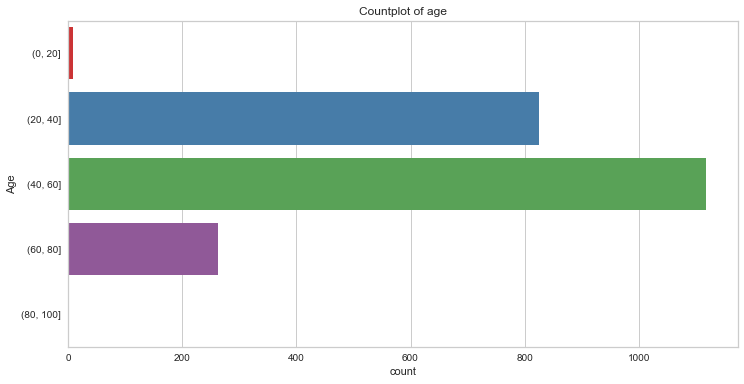

In [89]:
#Different age group customer classification summary
plt.figure(figsize=(12,6))
sb.countplot(y=aged, palette='Set1')
plt.title('Countplot of age')
print(aged.value_counts())

<AxesSubplot:xlabel='Age', ylabel='Spent'>

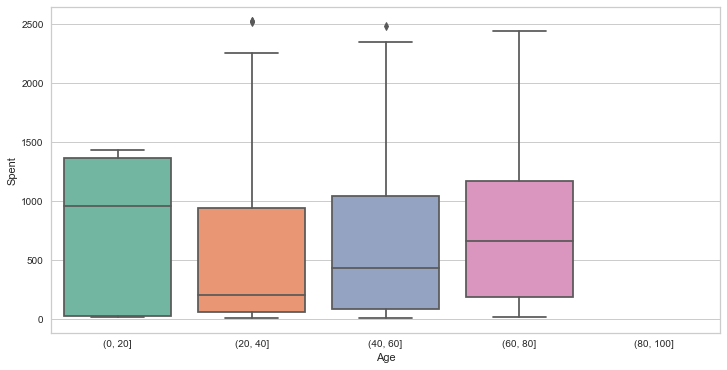

In [90]:
# Differences in shopping expenses for different age ranges
plt.figure(figsize=(12,6))
sb.boxplot(x=aged, y=data['Spent'], palette='Set2')

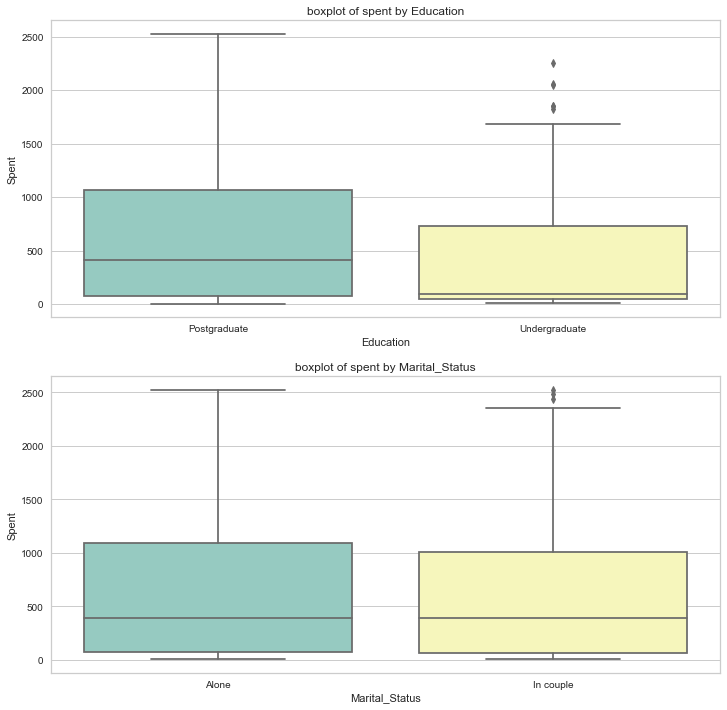

In [91]:
#The relationship between education level and shopping expenses

to_boxplot=['Education','Marital_Status']
fig, axes=plt.subplots(2,1, figsize=(12,12))
axes=axes.flatten()

for col, ax in zip(to_boxplot, axes):
    ax=sb.boxplot(x=col, y='Spent',data=data, ax=ax, palette='Set3')
    ax.set_title(f'boxplot of spent by {col}')

In [92]:
#Let's check if any of these differences are significant
for comparison in to_boxplot:
    grouped=data[[comparison,'Spent']].groupby([comparison])
    T,p=stats.ttest_ind(grouped.get_group(grouped[comparison].unique()[0][0])['Spent'], grouped.get_group(grouped[comparison].unique()[1][0])['Spent'], equal_var=True)
    print('Comparison between', comparison, '\nT =',T, ' p =',p)

Comparison between Education 
T = 5.389781408625638  p = 7.803934257552646e-08
Comparison between Marital_Status 
T = 0.742864204190754  p = 0.4576427822699022


#### Indeed, the Education groups show a statistically significant difference, whereas marital status doesn't appear to be significant

Text(18000, 2200, 'r = 0.8209474893658163')

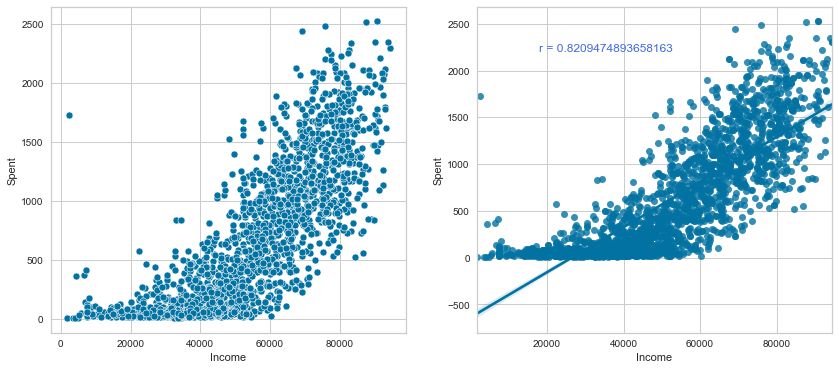

In [93]:
#Income and expenditure have a linear relationship
corr, p = pearsonr(data['Spent'],data['Income'])

fig, axes=plt.subplots(1,2, figsize=(14,6))
sb.scatterplot(y=data['Spent'], x=data['Income'], ax=axes[0])
sb.regplot(y=data['Spent'], x=data['Income'], ci=99, ax=axes[1])

axes[1].text(18000, 2200, ('r = '+str(corr)), fontsize=12, color='royalblue')

Text(0.5, 1.0, 'Histogram of overall spending')

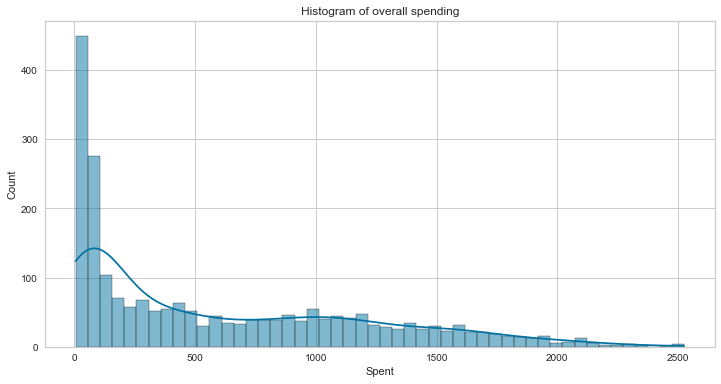

In [94]:
#Histogram of overall spending
plt.figure(figsize=(12,6))
sb.histplot(data['Spent'], bins=50, kde=True)
plt.title('Histogram of overall spending')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

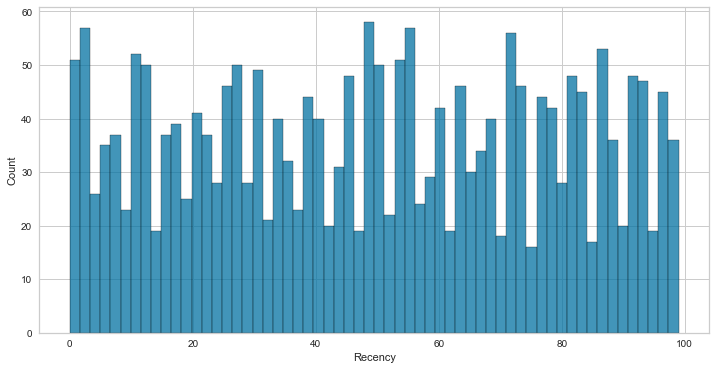

In [95]:
#Frequency distribution of the number of days since the user's last purchase
plt.figure(figsize=(12,6))
sb.histplot(data['Recency'], bins=60)

Text(0.5, 1.0, 'Monthly activities (5-7)/month')

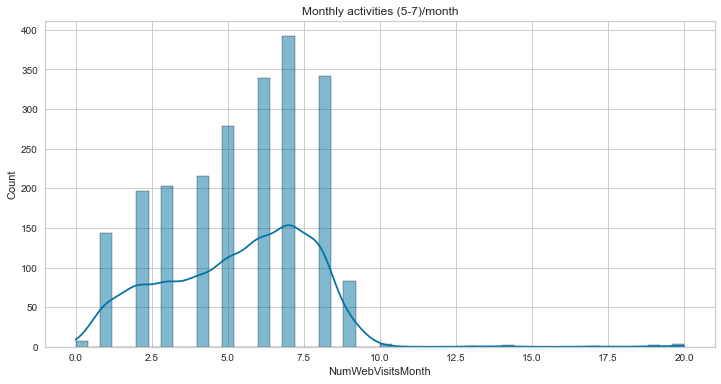

In [96]:
#Statistics of mothly activity frequency of website users
plt.figure(figsize=(12,6))
sb.histplot(data['NumWebVisitsMonth'],bins=50, kde=True)
plt.title('Monthly activities (5-7)/month')

Text(0.5, 1.0, 'Complain of customer')

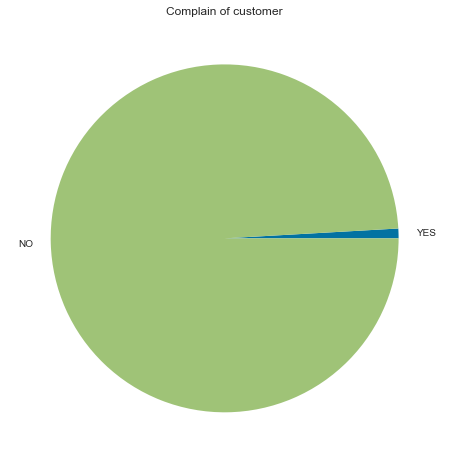

In [97]:
#Percentage of complainers
complain=data['Complain'].value_counts().sort_values()

plt.figure(figsize=(8,8))
plt.pie(x=complain, labels=['YES','NO'])
plt.title('Complain of customer')

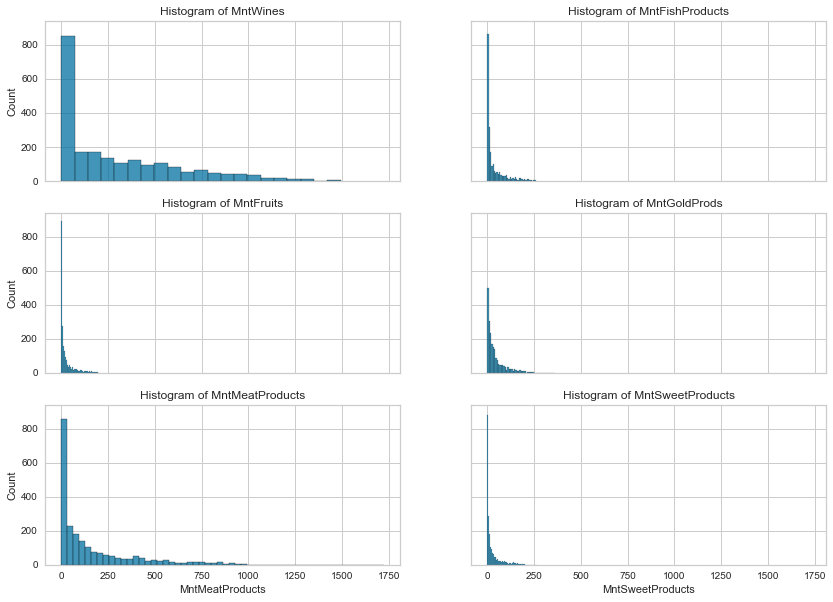

In [98]:
#Frequency statistics of Wines, Fish Products, Fruits, Gold Products, Meat Products, Sweet products, respectively
products=['MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts']

fig, axes = plt.subplots(3,2, sharex=True, sharey=True, figsize=(14,10))
axes=axes.flatten()

for col, ax in zip(products, axes):
    ax=sb.histplot(data=data, x=col, ax=ax)
    ax.set_title(f'Histogram of {col}')

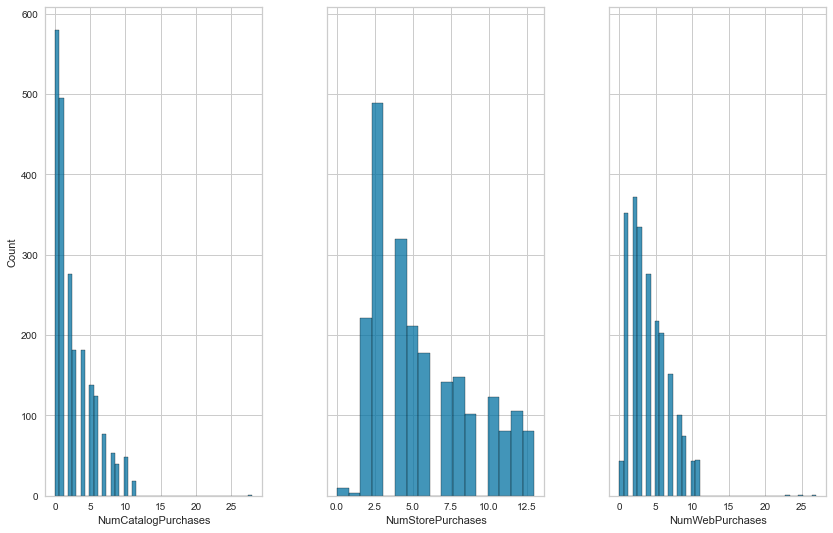

In [99]:
# Statistics of the frequency of purchases through the three channels of catalogs, stores and websites
purchases = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 9))
axes = axes.flatten()

for col, ax in zip(purchases, axes):
    ax = sb.histplot(data=data, x=col, ax=ax)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

In [100]:
# Create an indicator of the total number of bids accepted by the activity
acceptedConcat = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)

print('acceptedConcat:\n', acceptedConcat)

acceptedConcat:
 AcceptedCmp1    136
AcceptedCmp2     29
AcceptedCmp3    162
AcceptedCmp4    159
AcceptedCmp5    150
dtype: int64


<AxesSubplot:title={'center':'accepted the campaings in every attempt'}>

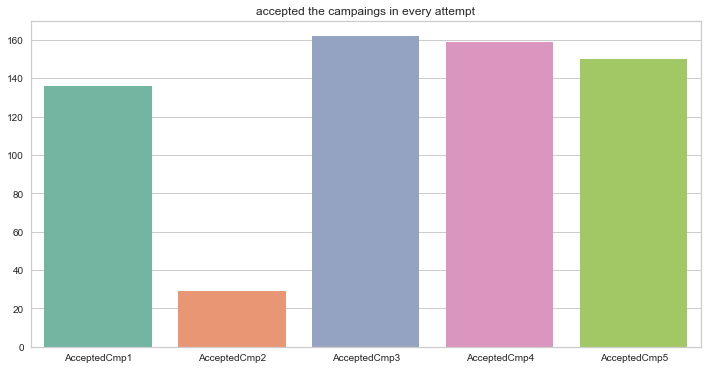

In [101]:
# Create an indicator of the total number of bids accepted by the activity
plt.figure(figsize=(12,6))
plt.title('accepted the campaings in every attempt')
sb.barplot(x=acceptedConcat.index, y=acceptedConcat, palette='Set2')

<AxesSubplot:title={'center':'Recency Vs Acceptance of an offer'}, xlabel='Recency', ylabel='Response'>

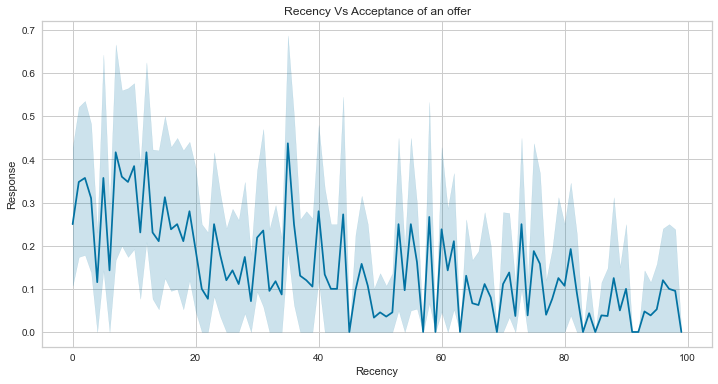

In [102]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(12,6))
plt.title('Recency Vs Acceptance of an offer')
sb.lineplot(x='Recency', y='Response', data=data)

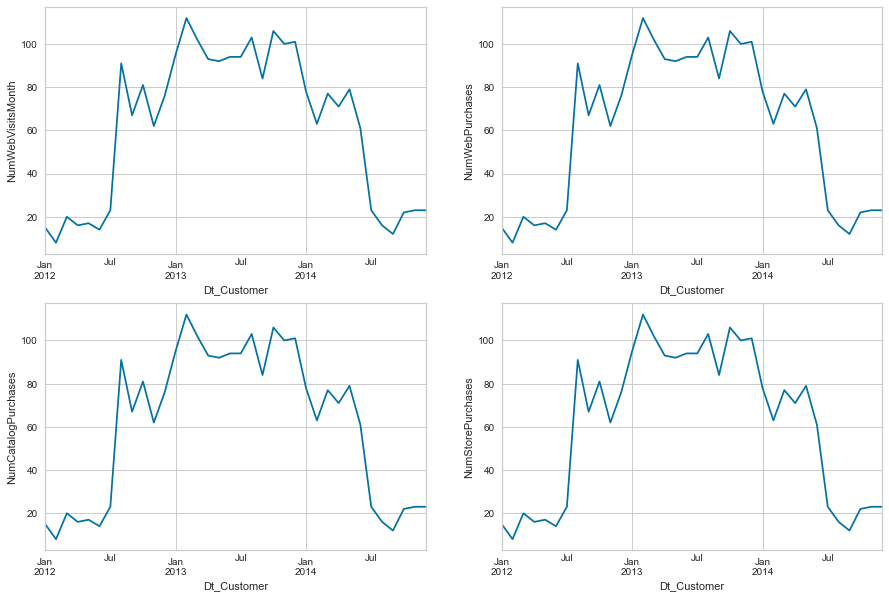

In [103]:
#Website monthly active users line chart
#Regroup the users by month of registration
groupedDate=data.set_index('Dt_Customer')
groupedDate=groupedDate.resample('M').count()

time_plot=['NumWebVisitsMonth','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

fig, axes=plt.subplots(2,2, figsize=(15,10))

axes = axes.flatten()

for col, ax in zip(time_plot, axes):
    groupedDate[col].plot(kind='line', ax=ax, ylabel=col)

#### It seems that all purchases and visits to the website declined sharply after spring 2014

In [104]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


<AxesSubplot:>

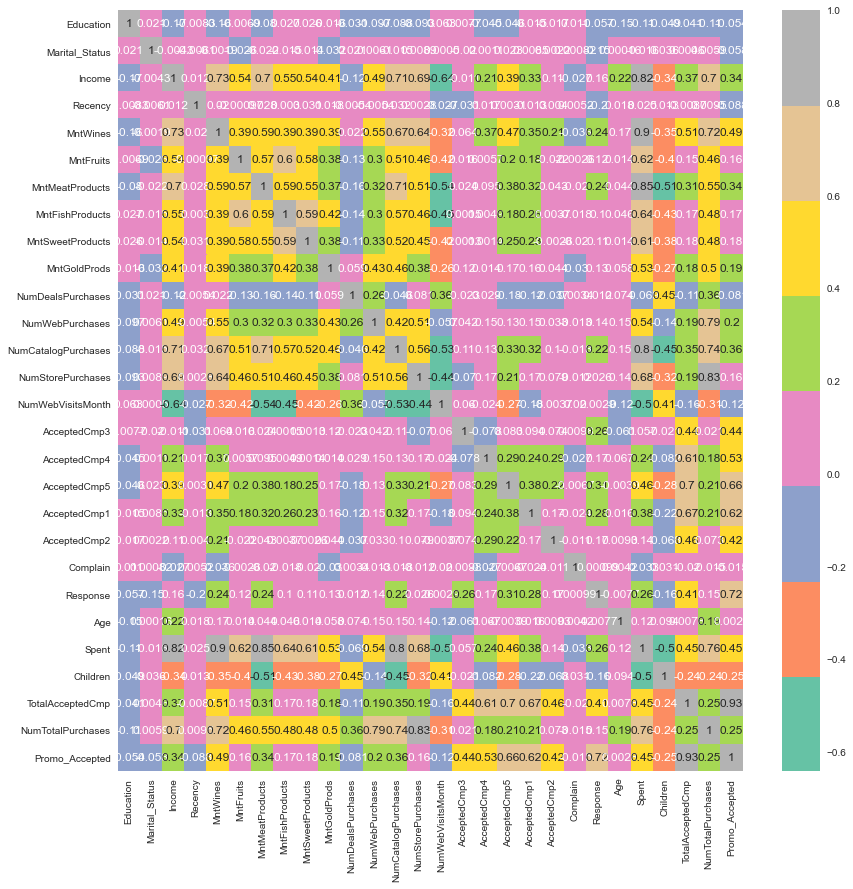

In [105]:
#Let's build a heat map of all the variables in the dataset
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

plt.figure(figsize = (14, 14))
data1 = data.iloc[:, 1:-1]
sb.heatmap(data1.corr(), annot=True, cmap='Set2')

#### Ok, some of these variables are quite correlated with each other, which is expected, but it makes it laborious to extract meaningful data out of it. Let's extract some latent variables out of the data

## PCA Dimension Reduction

In [106]:
#Make a safe copy of the dataset and delete variables we are not interested in
ds = data.copy()

cols_del = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
            'Complain', 'Response', 'Have_Children', 'Dt_Customer',  'Children']
ds = ds.drop(cols_del, axis=1)

#Data standardization
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds), columns=ds.columns)

In [107]:
pca=PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds), columns=['col1','col2','col3'])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2214.0,-1.680880e-16,2.811660,-4.798572,-2.628770,-0.656284,2.421201,8.600298
col2,2214.0,-1.404076e-18,1.370317,-4.688339,-0.938164,-0.267962,0.803198,5.821986
col3,2214.0,-5.516013e-17,1.345541,-3.185719,-0.656879,-0.145843,0.215878,7.413257


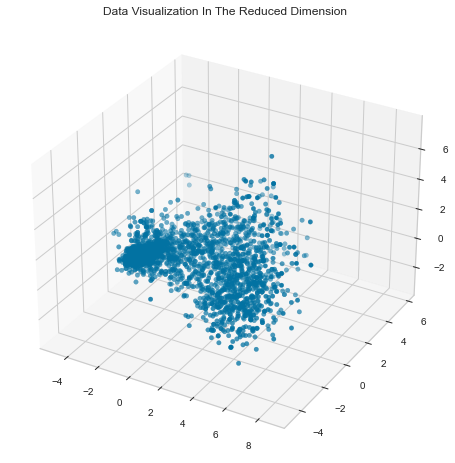

In [108]:
x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']

#Data Visualization after dimensionality reduction
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, marker='o')
ax.set_title("Data Visualization In The Reduced Dimension")
plt.show()


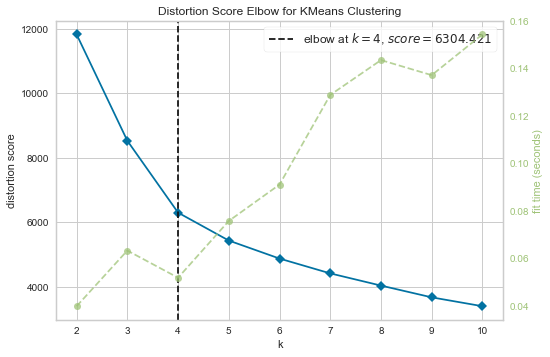

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
Elbow_M=KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [110]:
AC=AgglomerativeClustering(n_clusters=4)

#Fit the model and predict clusters
yhat_AC=AC.fit_predict(PCA_ds)
PCA_ds['Clusters']=yhat_AC

#Add clustering features to the original data
data['Clusters']=yhat_AC

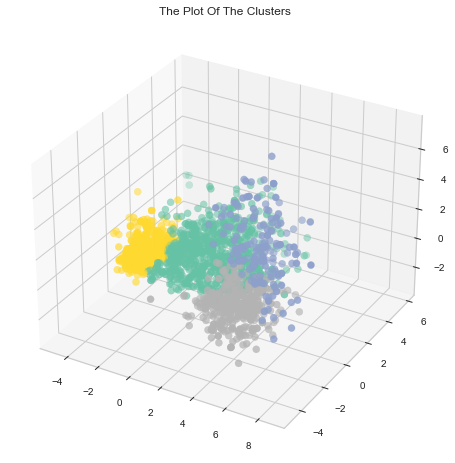

In [111]:
#Visualization of clustering results
fig=plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Model Evaluation

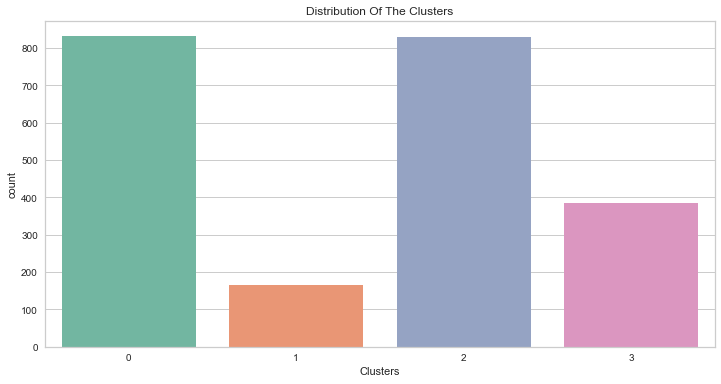

In [112]:
# Distribution map of clustering results, i.e. how many subjects per cluster
plt.figure(figsize=(12, 6))
pl = sb.countplot(x=data["Clusters"], palette= 'Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

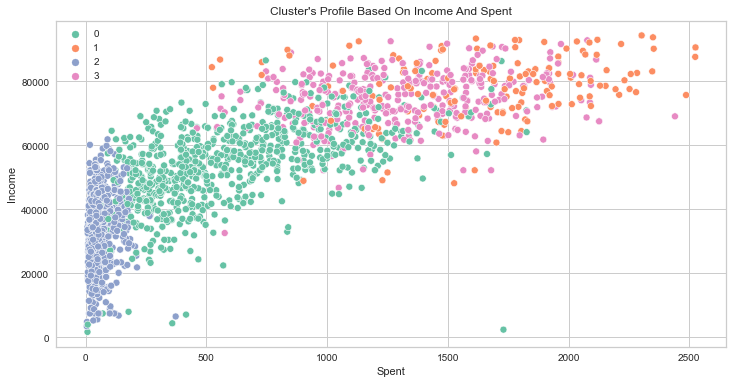

In [113]:
# Visualize the clustering results according to income and expenditure
plt.figure(figsize=(12, 6))
pl = sb.scatterplot(data = data,x=data['Spent'], y=data['Income'],hue=data['Clusters'], palette= 'Set2')
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

From this graph, it would appear that we can classify the groups as follows
- Group 0: High expenditure and average income
- Group 1: High expenditure and high income
- Group 2: Low expenditure and low income
- Group 3: Average income and high expenditure

C:\Users\Dzousep\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dzousep\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Clusters', ylabel='Spent'>

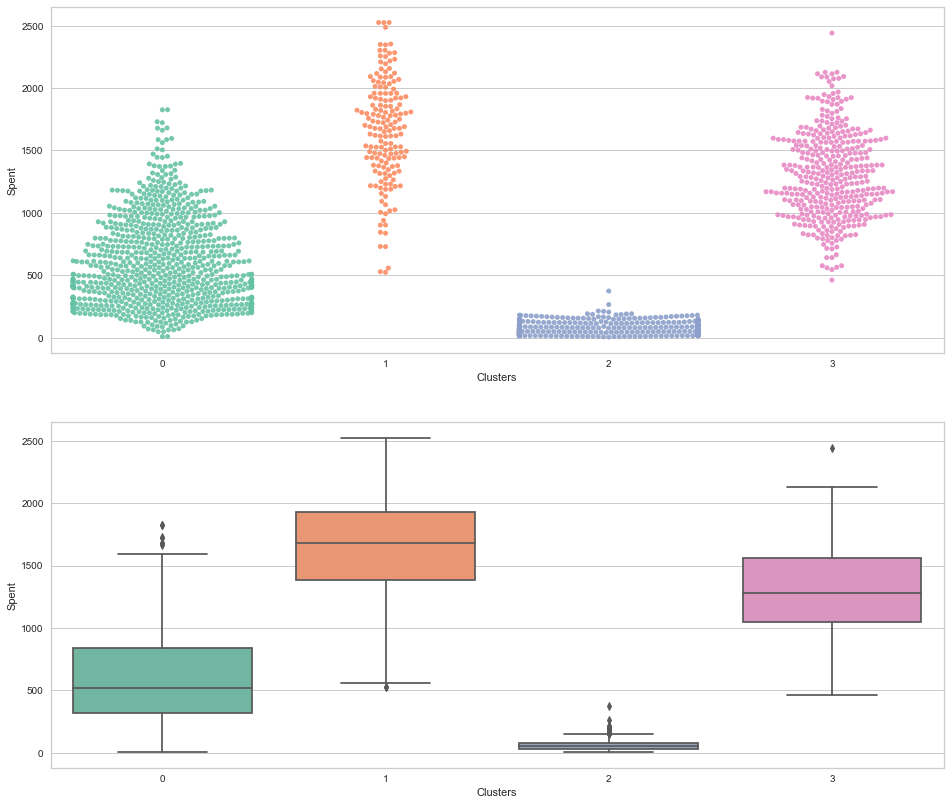

In [114]:
#Spending by each cluster
fig, axes=plt.subplots(2,1, figsize=(16,14))
sb.swarmplot(x=data['Clusters'], y=data['Spent'], alpha=0.9, palette= 'Set2', ax=axes[0])
sb.boxplot(x=data['Clusters'], y=data['Spent'], palette='Set2', ax=axes[1])